In [1]:
import pandas as pd
import numpy as np

# Headlines

In [2]:
hl = pd.read_csv('raw_partner_headlines.csv')
len(hl)

1845559

In [3]:
hl.head()

Unnamed: 0                                           headline  \
0           2  Agilent Technologies Announces Pricing of $5……...   
1           3  Agilent (A) Gears Up for Q2 Earnings: What's i...   
2           4  J.P. Morgan Asset Management Announces Liquida...   
3           5  Pershing Square Capital Management, L.P. Buys ...   
4           6  Agilent Awards Trilogy Sciences with a Golden ...   

                                                 url  publisher  \
0  http://www.gurufocus.com/news/1153187/agilent-...  GuruFocus   
1  http://www.zacks.com/stock/news/931205/agilent...      Zacks   
2  http://www.gurufocus.com/news/1138923/jp-morga...  GuruFocus   
3  http://www.gurufocus.com/news/1138704/pershing...  GuruFocus   
4  http://www.gurufocus.com/news/1134012/agilent-...  GuruFocus   

                  date stock  
0  2020-06-01 00:00:00     A  
1  2020-05-18 00:00:00     A  
2  2020-05-15 00:00:00     A  
3  2020-05-15 00:00:00     A  
4  2020-05-12 00:00:00     A

# Dow Jones Index

Only Include Dow Jones Index Companies - brief description, most well known companies

In [4]:
# https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average
dow_table = """Apple Inc.	NASDAQ	AAPL	Information technology	2015-03-19		2.57%
Amgen	NASDAQ	AMGN	Pharmaceutical industry	2020-08-31		4.87%
American Express	NYSE	AXP	Financial services	1982-08-30		2.88%
Boeing	NYSE	BA	Aerospace and defense	1987-03-12		4.92%
Caterpillar Inc.	NYSE	CAT	Construction and Mining	1991-05-06		4.54%
Salesforce	NYSE	CRM	Information technology	2020-08-31		4.45%
Cisco Systems	NASDAQ	CSCO	Information technology	2009-06-08		1.00%
Chevron Corporation	NYSE	CVX	Petroleum industry	2008-02-19	Also 1930-07-18 to 1999-11-01	2.03%
The Walt Disney Company	NYSE	DIS	Broadcasting and entertainment	1991-05-06		3.66%
Dow Inc.	NYSE	DOW	Chemical industry	2019-04-02		1.25%
Goldman Sachs	NYSE	GS	Financial services	2013-09-20		6.54%
The Home Depot	NYSE	HD	Retailing	1999-11-01		6.24%
Honeywell	NASDAQ	HON	Conglomerate	2020-08-31		4.47%
IBM	NYSE	IBM	Information technology	1979-06-29	Also 1932-05-26 to 1939-03-04	2.59%
Intel	NASDAQ	INTC	Information technology	1999-11-01		1.25%
Johnson & Johnson	NYSE	JNJ	Pharmaceutical industry	1997-03-17		3.12%
JPMorgan Chase	NYSE	JPM	Financial services	1991-05-06		2.95%
The Coca-Cola Company	NYSE	KO	Food industry	1987-03-12	Also 1932-05-26 to 1935-11-20	1.04%
McDonald's	NYSE	MCD	Food industry	1985-10-30		4.49%
3M	NYSE	MMM	Conglomerate	1976-08-09	As Minnesota Mining and Manufacturing	3.84%
Merck & Co.	NYSE	MRK	Pharmaceutical industry	1979-06-29		1.49%
Microsoft	NASDAQ	MSFT	Information technology	1999-11-01		4.98%
Nike, Inc.	NYSE	NKE	Apparel	2013-09-20		2.58%
Procter & Gamble	NYSE	PG	Fast-moving consumer goods	1932-05-26		2.64%
The Travelers Companies	NYSE	TRV	Financial services	2009-06-08		3.03%
UnitedHealth Group	NYSE	UNH	Managed health care	2012-09-24		7.33%
Visa Inc.	NYSE	V	Financial services	2013-09-20		4.33%
Verizon Communications	NYSE	VZ	Telecommunication	2004-04-08		1.13%
Walgreens Boots Alliance	NASDAQ	WBA	Retailing	2018-06-26		1.06%
Walmart	NYSE	WMT	Retailing	1997-03-17		2.72%""".split("\n")

In [5]:
dow = []
for row in dow_table:
    dow.append(row.split("\t")[2])

# Analyst Ratings

In [6]:
an = pd.read_csv('raw_analyst_ratings.csv')
an.tail()

Unnamed: 0                                           headline  \
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url       publisher  \
1407323  https://www.benzinga.com/news/11/08/1888782/to...   Monica Gerson   
1407324  https://www.benzinga.com/news/earnings/11/06/1...    Benjamin Lee   
1407325  https://www.benzinga.com/analyst-ratings/analy...  BenzingaStaffL   
1407326  https://www.benzinga.com/analyst-ratings/price...       Joe Young   
1407327  https://www.benzinga.com/news/ipos/11/05/10789...   Allie Wickman   

                        date stock  
1407323  2011-08-29 00:00:00    ZX  
1407324  2011-06-22 00:00:00    ZX  
1407325  2011-06-21 00:00:00    ZX  
1407326  2011-06-21 00:00:00    ZX  
1407327  2011-05-12 00:00:00    ZX

# Check Number of Headlines and Analyst Ratings per stock

In [7]:
# Headlines and Ratings of Stocks in the Dow
hl_dow = hl[hl.stock.isin(dow)]
an_dow = an[an.stock.isin(dow)]

In [8]:
# Check number of headline and ratings
counts = pd.DataFrame([hl_dow.groupby('stock')['headline'].agg(len),
                       an_dow.groupby('stock')['headline'].agg(len).rename('ratings')]).transpose()
counts

headline  ratings
AAPL      32.0    441.0
AMGN       9.0    150.0
AXP     1926.0   1857.0
CAT        7.0   2322.0
CRM        5.0   1483.0
CSCO     508.0   1010.0
DIS      933.0     10.0
DOW     2418.0   1227.0
HD      1841.0   2612.0
IBM        2.0   1090.0
INTC    2465.0     10.0
JPM     2873.0     10.0
KO        77.0   2797.0
MCD        8.0   2228.0
MMM        6.0   1489.0
MRK        2.0   3333.0
PG         7.0   1305.0
TRV     2203.0    656.0
UNH      170.0    230.0
V         28.0     10.0
VZ         6.0   2966.0
WBA     1375.0   1194.0
WMT        1.0     10.0
BA         NaN     10.0
JNJ        NaN   2928.0

In [9]:
# Only include stocks with >10 headlines & >10 ratings for analysis to get more significant
# results with larger numbers of headlines and ratings.

dow_incl = counts[(counts['headline']>10) & (counts['ratings']>10)].index
dow_incl

Index(['AAPL', 'AXP', 'CSCO', 'DOW', 'HD', 'KO', 'TRV', 'UNH', 'WBA'], dtype='object')

In [10]:
counts.loc[dow_incl,:]

headline  ratings
AAPL      32.0    441.0
AXP     1926.0   1857.0
CSCO     508.0   1010.0
DOW     2418.0   1227.0
HD      1841.0   2612.0
KO        77.0   2797.0
TRV     2203.0    656.0
UNH      170.0    230.0
WBA     1375.0   1194.0

In [11]:
# Filtering these stocks in hl and an
# These contain the data to analyze
headlines = hl[hl.stock.isin(dow_incl)]
ratings = an[an.stock.isin(dow_incl)]

# Check Date Range

In [12]:
headlines.date

4067       2020-06-02 00:00:00
4068       2020-06-02 00:00:00
4069       2020-06-02 00:00:00
4070       2020-06-01 00:00:00
4071       2020-06-01 00:00:00
                  ...         
1747360    2018-03-24 00:00:00
1747361    2018-03-23 00:00:00
1747362    2018-03-23 00:00:00
1747363    2018-03-23 00:00:00
1747364    2018-03-23 00:00:00
Name: date, Length: 10550, dtype: object

In [13]:
from datetime import datetime

In [14]:
def time_conv(x):
    if pd.isnull(x):
        return np.nan
    else:
        try:
            return datetime.strptime(str(x)[:19], "%Y-%m-%d %H:%M:%S")
        except:
            return np.nan

In [15]:
headlines['date'] = headlines.date.map(time_conv)
ratings['date'] = ratings.date.map(time_conv)

<ipython-input-15-398bb3e6991a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headlines['date'] = headlines.date.map(time_conv)
<ipython-input-15-398bb3e6991a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['date'] = ratings.date.map(time_conv)


In [16]:
headlines_dates = headlines.groupby('stock')['date'].agg([min, max])

In [17]:
headlines_dates = headlines_dates.merge(ratings.groupby('stock')['date'].agg([min, max]), left_index=True, right_index=True, suffixes=['_headlines','_ratings'])

In [18]:
# Most stocks have data ending May or June 2020
# Some stocks have data starting late 2019 or 2020 only,
# will exclude these and only include stocks with data starting prior to 2019 only
# this gives roughly 1.5 years of data minimum

In [19]:
min_date = datetime.strptime("2019-01-01", "%Y-%m-%d")

headlines_dates = headlines_dates[(headlines_dates.min_headlines < min_date) &
                                  (headlines_dates.min_ratings < min_date)]
headlines_dates

min_headlines max_headlines min_ratings         max_ratings
stock                                                            
AXP      2016-04-20    2020-06-03  2009-08-07 2020-06-10 10:22:11
DOW      2010-03-01    2020-06-03  2009-08-25 2020-06-09 10:52:15
HD       2018-04-23    2020-06-04  2009-08-10 2020-06-10 08:14:08
TRV      2010-03-05    2020-05-29  2009-10-22 2020-06-11 10:05:13
WBA      2018-03-23    2020-05-27  2014-12-31 2020-06-08 11:34:19

In [20]:
# Update analysis universe
dow_incl = headlines_dates.index

headlines = hl[hl.stock.isin(dow_incl)]
ratings = an[an.stock.isin(dow_incl)]

# Sentiment scores on headlines and ratings

In [21]:
import nltk 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()

# check the distribution of the lexicon and sentiment values
pd.Series(vader.lexicon).describe()

count    7502.000000
mean       -0.181938
std         1.700843
min        -3.900000
25%        -1.600000
50%        -0.500000
75%         1.500000
max         3.400000
dtype: float64

## Add some word and sentiment values
For financial use case we need more specific words: manually add

In [23]:
# https://www.kaggle.com/mmmarchetti/sentiment-analysis-on-financial-news
# New words and values
new_words = {
    'crushes': -1.9,
    'beats': 1,
    'misses': -1,
    'trouble': -1.7,
    'falls': -1.5,
    'dovish': 0.5,
    'hawkish': -0.5
}

In [24]:
# Check values:
for word in new_words.keys():
    try: 
        print(word, vader.lexicon[word])
    except:
        pass

crushes -1.9
misses -0.9
trouble -1.7


In [25]:
lex = pd.Series(vader.lexicon)
lex[lex>0].mean()

1.5313531353135323

In [26]:
lex[lex<0].mean()

-1.5516670664427912

### Add words from a word list:
These are positive and negative word lists but no values attached, will add them with the mean positive and negative scores of the existing lexicon

In [27]:
# https://sraf.nd.edu/textual-analysis/resources/
# Suggested by classmate Stuart Ong from peer review of proposal
word_list_pos = pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx', sheet_name='Positive', 
                              header=None)[0].map(lambda x: x.lower())
word_list_neg= pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx', sheet_name='Negative', 
                              header=None)[0].map(lambda x: x.lower())

In [28]:
# Add the missing words to the vader lexicon with the mean values
words_pos = pd.DataFrame(word_list_pos[~word_list_pos.isin(lex.index)])
words_pos['score']=lex[lex>0].mean()
dict_words_pos = words_pos.set_index(0)['score'].to_dict()

words_neg = pd.DataFrame(word_list_neg[~word_list_neg.isin(lex.index)])
words_neg['score']=lex[lex<0].mean()
dict_words_neg = words_neg.set_index(0)['score'].to_dict()

In [29]:
# Update the lexicon
vader.lexicon.update(new_words)
vader.lexicon.update(dict_words_pos)
vader.lexicon.update(dict_words_neg)

# Put sentiment scores in the headlines and ratings

In [30]:
pd.options.display.max_colwidth =300
pd.options.display.max_rows =100

In [31]:
def add_scores(df, text_col_name):
#     try:
#         df.drop(score_column, axis=1, inplace=True)
#     except:
#         pass
    scores = df[text_col_name].apply(vader.polarity_scores)
    for item in scores.iteritems():
        item[1]['index'] = item[0]
        
    scores = pd.DataFrame.from_records(scores.reset_index()[text_col_name], index='index')
    df = df.join(scores)
    
    return df, scores

In [32]:
headlines, hl_scores = add_scores(headlines, 'headline')
ratings, ratings_scores = add_scores(ratings, 'headline')

In [33]:
# ratings.drop('score', axis=1, inplace=True)

In [34]:
headlines.head()

Unnamed: 0  \
151569      151958   
151570      151959   
151571      151960   
151572      151961   
151573      151962   

                                                                                                  headline  \
151569                                                                     US Indexes End Higher Wednesday   
151570     Thinking about trading options or stock in Micron Technology, Boeing, Penn National Gaming, ...   
151571                                              Zoom Stock Rises Then Falls After Blockbuster Earnings   
151572                                               Bill Nygren Adds 4 Stocks to Portfolio in –st Quarter   
151573  Oakmark Fund Buys American Express Co, Workday Inc, Match Group Inc, Sells Citigroup Inc, Bank ...   

                                                                                                                                                                                url  \
151569                                                                                                        http://www.gurufocus.com/news/1154923/us-indexes-end-higher-wednesday   
151570             http://www.gurufocus.com/news/1154684/thinking-about-trading-options-or-stock-in-micron-technology-boeing-penn-national-gaming-american-express-or-carnival-corp   
151571                                                                           https://talkmarkets.com/content/zoom-stock-rises-then-falls-after-blockbuster-earnings?post=264259   
151572                                                                                  http://www.gurufocus.com/news/1153868/bill-nygren-adds-4-stocks-to-portfolio-in-1st-quarter   
151573  http://www.gurufocus.com/news/1152994/oakmark-fund-buys-american-express-co-workday-inc-match-group-inc-sells-citigroup-inc-bank-of-america-corp-capital-one-financial-corp   

          publisher                 date stock    neg    neu    pos  compound  
151569    GuruFocus  2020-06-03 00:00:00   AXP  0.000  1.000  0.000      0.00  
151570    GuruFocus  2020-06-03 00:00:00   AXP  0.000  1.000  0.000      0.00  
151571  TalkMarkets  2020-06-03 00:00:00   AXP  0.202  0.484  0.315      0.34  
151572    GuruFocus  2020-06-02 00:00:00   AXP  0.000  1.000  0.000      0.00  
151573    GuruFocus  2020-06-01 00:00:00   AXP  0.000  1.000  0.000      0.00

In [35]:
ratings.head()

Unnamed: 0  \
122483      123364   
122484      123365   
122485      123366   
122486      123367   
122487      123368   

                                                                                                                                                                                                                                                                                                  headline  \
122483  Shares of several financial services companies are trading lower as markets sell off following recent strength and as investors await today's Federal Reserve decision. UPDATE: Equities spiked following the Fed's decision to leave rates unchanged, with several stocks now up for the session.   
122484                                                                                                                                                                                                                           Jefferies Maintains Hold on American Express, Raises Price Target to $110   
122485                                                                                                                                                                                             FTC Bans Madera Merchant Services LLC, B&P Enterprises LLC and Owners Bruce C. Woods and Patricia Woods   
122486                             Shares of several financial services companies are trading lower as equities sell off following recent rally. Stocks have rallied over the past week amid optimism towards the US economy reopening and investors have potentially taken some profits following run up.   
122487                                                                                                                                                                                                                Morgan Stanley Maintains Overweight on American Express, Raises Price Target to $117   

                                                                                                                                                      url  \
122483  https://www.benzinga.com/wiim/20/06/16222456/shares-of-several-financial-services-companies-are-trading-lower-as-markets-sell-off-following-recen   
122484                               https://www.benzinga.com/news/20/06/16220746/jefferies-maintains-hold-on-american-express-raises-price-target-to-110   
122485  https://www.benzinga.com/news/20/06/16214568/ftc-bans-madera-merchant-services-llc-b-p-enterprises-llc-and-owners-bruce-c-woods-and-patricia-wood   
122486  https://www.benzinga.com/wiim/20/06/16212810/shares-of-several-financial-services-companies-are-trading-lower-as-equities-sell-off-following-rece   
122487                    https://www.benzinga.com/news/20/06/16199843/morgan-stanley-maintains-overweight-on-american-express-raises-price-target-to-117   

                publisher                       date stock    neg    neu  \
122483  Benzinga Newsdesk  2020-06-10 10:22:11-04:00   AXP  0.071  0.788   
122484  Benzinga Newsdesk  2020-06-10 08:34:38-04:00   AXP  0.000  1.000   
122485  Benzinga Newsdesk  2020-06-09 13:09:24-04:00   AXP  0.138  0.862   
122486  Benzinga Newsdesk  2020-06-09 10:34:41-04:00   AXP  0.047  0.769   
122487  Benzinga Newsdesk  2020-06-08 07:44:54-04:00   AXP  0.185  0.815   

          pos  compound  
122483  0.141    0.5267  
122484  0.000    0.0000  
122485  0.000   -0.3719  
122486  0.184    0.7506  
122487  0.000   -0.3612

# Get stock price data (yFinance)

https://aroussi.com/post/python-yahoo-finance

In [36]:
# list of stocks reminder
dow_incl

Index(['AXP', 'DOW', 'HD', 'TRV', 'WBA'], dtype='object', name='stock')

In [37]:
# dates we need
headlines_dates

min_headlines max_headlines min_ratings         max_ratings
stock                                                            
AXP      2016-04-20    2020-06-03  2009-08-07 2020-06-10 10:22:11
DOW      2010-03-01    2020-06-03  2009-08-25 2020-06-09 10:52:15
HD       2018-04-23    2020-06-04  2009-08-10 2020-06-10 08:14:08
TRV      2010-03-05    2020-05-29  2009-10-22 2020-06-11 10:05:13
WBA      2018-03-23    2020-05-27  2014-12-31 2020-06-08 11:34:19

In [38]:
import yfinance as yf


In [39]:
data = yf.download(" ".join(dow_incl), start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  5 of 5 completed

1 Failed download:
- DOW: Data doesn't exist for startDate = 1483200000, endDate = 1493481600


In [40]:
data_DOW = yf.download("DWDP", start="2017-01-01", end="2019-03-20")
data_DOW

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DWDP: No data found, symbol may be delisted


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [41]:
# DOW started 20 Mar 2019
# stock was DWDP prior, and went thru a merger.  It is not possible to retrieve delisted stock data from this package.
# we will drop DOW from our analysis
dow_incl = dow_incl.drop('DOW')


In [42]:
headlines_dates = headlines_dates.drop('DOW', axis=0)
headlines_dates

min_headlines max_headlines min_ratings         max_ratings
stock                                                            
AXP      2016-04-20    2020-06-03  2009-08-07 2020-06-10 10:22:11
HD       2018-04-23    2020-06-04  2009-08-10 2020-06-10 08:14:08
TRV      2010-03-05    2020-05-29  2009-10-22 2020-06-11 10:05:13
WBA      2018-03-23    2020-05-27  2014-12-31 2020-06-08 11:34:19

We will select date period where both headlines and ratings are avaialble for analysis

In [43]:
headlines_dates.loc[:,'start_date'] = headlines_dates[['min_headlines', 'min_ratings']].max(axis=1)
headlines_dates.loc[:,'end_date'] = headlines_dates[['max_headlines', 'max_ratings']].max(axis=1)
headlines_dates

min_headlines max_headlines min_ratings         max_ratings start_date  \
stock                                                                          
AXP      2016-04-20    2020-06-03  2009-08-07 2020-06-10 10:22:11 2016-04-20   
HD       2018-04-23    2020-06-04  2009-08-10 2020-06-10 08:14:08 2018-04-23   
TRV      2010-03-05    2020-05-29  2009-10-22 2020-06-11 10:05:13 2010-03-05   
WBA      2018-03-23    2020-05-27  2014-12-31 2020-06-08 11:34:19 2018-03-23   

                 end_date  
stock                      
AXP   2020-06-10 10:22:11  
HD    2020-06-10 08:14:08  
TRV   2020-06-11 10:05:13  
WBA   2020-06-08 11:34:19

In [44]:
px_data = yf.download(" ".join(dow_incl), 
                      start=headlines_dates.start_date.min(), 
                      end=headlines_dates.end_date.max())

[*********************100%***********************]  4 of 4 completed


In [45]:
px_data = px_data.loc[:,px_data.columns.get_level_values(0) == 'Adj Close']
px_data.columns = px_data.columns.get_level_values(1)
px_data

AXP          HD         TRV        WBA
Date                                                     
2010-03-04   32.841263   24.091663   40.552822  26.689392
2010-03-05   33.947525   24.367517   40.848156  26.681772
2010-03-08   33.533726   24.490128   40.992924  26.491142
2010-03-09   33.525291   24.456156   40.817680  26.224245
2010-03-10   33.542187   24.479322   40.299549  26.132734
...                ...         ...         ...        ...
2020-06-04  104.933197  244.767258  114.978394  42.776699
2020-06-05  108.075089  250.617279  121.175537  43.889660
2020-06-08  111.955658  252.455856  124.722321  45.505890
2020-06-09  108.794060  252.446045  123.025360  43.821918
2020-06-10  104.558922  250.174850  118.670135  42.854118

[2586 rows x 4 columns]

# Merge headlines, ratings to px_data time series

## add headlines, ratings sentiment scores to the px_data time_series

In [46]:
px_data

AXP          HD         TRV        WBA
Date                                                     
2010-03-04   32.841263   24.091663   40.552822  26.689392
2010-03-05   33.947525   24.367517   40.848156  26.681772
2010-03-08   33.533726   24.490128   40.992924  26.491142
2010-03-09   33.525291   24.456156   40.817680  26.224245
2010-03-10   33.542187   24.479322   40.299549  26.132734
...                ...         ...         ...        ...
2020-06-04  104.933197  244.767258  114.978394  42.776699
2020-06-05  108.075089  250.617279  121.175537  43.889660
2020-06-08  111.955658  252.455856  124.722321  45.505890
2020-06-09  108.794060  252.446045  123.025360  43.821918
2020-06-10  104.558922  250.174850  118.670135  42.854118

[2586 rows x 4 columns]

In [47]:
def get_score_df(df, stock):
    df.date = pd.to_datetime(df.date)
    cols_chart = ['date', 'compound','pos','neg','neu']
    score_df = df.loc[df.stock==stock, cols_chart].set_index('date')
    return score_df

In [48]:
# plot score and stock_px
import matplotlib.pyplot as plt
import altair as alt

In [137]:
def plot_chart(df, stock, score, color_scheme, kind='price'):
    """
    df: headline or ratings df containing scores
    stock: stock name to get scores and prices from px_data
    score: ("compound", "pos", "neg", "neu")
    color_scheme: color scheme to use for score circles https://vega.github.io/vega/docs/schemes/
    """
    series_score = get_score_df(df, stock)

    start_date_chart = series_score.index.min()
    end_date_chart = series_score.index.max()

    if kind=='price':
        chart_px_data= px_data
    
        chart_px = alt.Chart(chart_px_data.reset_index()).mark_line(color='#31a354', clip=True).encode(
                        x=alt.X('Date', scale={'domain': [start_date_chart, end_date_chart]}),
                        y=alt.Y(stock)
                        )

    elif kind=='return':
        px_data_log = np.log(px_data.shift(-1) / px_data)
        chart_px_data = px_data_log
        
        chart_px = alt.Chart(chart_px_data.reset_index()).mark_circle(color='blue', clip=True, size=20).encode(
                        x=alt.X('Date', scale={'domain': [start_date_chart, end_date_chart]}),
                        y=alt.Y(stock)
                        )
        
    chart_score = (alt.Chart(series_score.reset_index()).mark_circle(size=20)
                           .encode(
                               x=alt.X('date', scale={'domain': [start_date_chart, end_date_chart]}),
                               y=score,
                               color=alt.Color(score, scale=alt.Scale(scheme=color_scheme))
                           ))

    return ((chart_score + chart_px).resolve_scale(x='shared', y='independent')
                                .properties(height=500, width=800))

In [138]:
plot_chart(headlines,'AXP','compound', "redyellowgreen", 'return')

alt.LayerChart(...)

In [139]:
plot_chart(headlines,'AXP','compound', "redyellowgreen", 'price')

alt.LayerChart(...)

In [140]:
plot_chart(headlines,'AXP','pos', 'yellowgreen')

alt.LayerChart(...)

In [141]:
plot_chart(headlines,'AXP','pos', 'yellowgreen', 'return')

alt.LayerChart(...)

In [142]:
plot_chart(headlines,'AXP','neg', 'yelloworangered')

alt.LayerChart(...)

In [143]:
plot_chart(headlines,'AXP','neg', 'yelloworangered', 'return')

alt.LayerChart(...)

# Get numerical analysis of returns vs scores

In [144]:
#Test code interim results before agg
series_score = get_score_df(headlines,'AXP')

start_date_chart = series_score.index.min()
end_date_chart = series_score.index.max()

px_data_log = np.log(px_data.shift(-1) / px_data)
px_data_log = px_data_log.loc[start_date_chart: end_date_chart, "AXP"]
res = series_score.merge(px_data_log, how='right', left_index=True, right_index=True).fillna(0)
res

compound    pos    neg    neu       AXP
2016-04-20   -0.3719  0.000  0.267  0.733  0.009033
2016-04-20    0.0000  0.000  0.000  1.000  0.009033
2016-04-20    0.0000  0.000  0.000  1.000  0.009033
2016-04-20   -0.1531  0.000  0.167  0.833  0.009033
2016-04-20    0.0000  0.000  0.000  1.000  0.009033
2016-04-20    0.0000  0.000  0.000  1.000  0.009033
2016-04-20   -0.0391  0.219  0.233  0.548  0.009033
2016-04-21   -0.4019  0.000  0.474  0.526  0.004865
2016-04-21   -0.4019  0.000  0.252  0.748  0.004865
2016-04-21    0.0000  0.000  0.000  1.000  0.004865
2016-04-21    0.0000  0.000  0.000  1.000  0.004865
2016-04-22    0.0000  0.000  0.000  1.000 -0.003495
2016-04-22    0.0000  0.000  0.000  1.000 -0.003495
2016-04-22    0.4019  0.351  0.000  0.649 -0.003495
2016-04-25    0.0000  0.000  0.000  0.000  0.007582
2016-04-26    0.0000  0.000  0.000  0.000  0.000453
2016-04-27    0.0000  0.000  0.000  0.000 -0.005906
2016-04-28    0.0000  0.000  0.000  0.000 -0.006247
2016-04-29    0.0000  0.000  0.000  0.000  0.003814
2016-05-02    0.0000  0.000  0.000  1.000 -0.012717
2016-05-02    0.4019  0.310  0.000  0.690 -0.012717
2016-05-02    0.0000  0.000  0.000  1.000 -0.012717
2016-05-02    0.0000  0.000  0.000  1.000 -0.012717
2016-05-02    0.0000  0.000  0.000  1.000 -0.012717
2016-05-03    0.0000  0.000  0.000  1.000 -0.009139
2016-05-03    0.0000  0.000  0.000  1.000 -0.009139
2016-05-04    0.0000  0.000  0.000  1.000 -0.005305
2016-05-04    0.0000  0.000  0.000  1.000 -0.005305
2016-05-05    0.0000  0.000  0.000  0.000  0.009188
2016-05-06    0.3400  0.255  0.000  0.745 -0.008250
2016-05-06    0.3182  0.247  0.000  0.753 -0.008250
2016-05-09    0.0000  0.000  0.000  1.000  0.013352
2016-05-09    0.0000  0.000  0.000  1.000  0.013352
2016-05-09    0.0000  0.000  0.000  1.000  0.013352
2016-05-09    0.0258  0.243  0.237  0.520  0.013352
2016-05-10   -0.3719  0.000  0.203  0.797 -0.003863
2016-05-10   -0.1280  0.000  0.200  0.800 -0.003863
2016-05-11    0.0000  0.000  0.000  0.000 -0.003878
2016-05-12    0.0000  0.000  0.000  0.000 -0.003425
2016-05-13    0.0000  0.000  0.000  1.000 -0.000780
2016-05-16    0.0000  0.000  0.000  0.000 -0.020658
2016-05-17    0.0000  0.000  0.000  1.000  0.012037
2016-05-17    0.2500  0.313  0.239  0.448  0.012037
2016-05-17    0.1027  0.113  0.000  0.887  0.012037
2016-05-18   -0.3400  0.000  0.194  0.806 -0.012355
2016-05-19    0.0000  0.000  0.000  0.000  0.018633
2016-05-20    0.0000  0.000  0.000  1.000 -0.005176
2016-05-20    0.5574  0.340  0.000  0.660 -0.005176
2016-05-20    0.0000  0.000  0.000  1.000 -0.005176
2016-05-20    0.3818  0.342  0.000  0.658 -0.005176
2016-05-23    0.0000  0.000  0.000  1.000  0.019929
2016-05-23   -0.4939  0.000  0.286  0.714  0.019929
2016-05-24   -0.3719  0.000  0.267  0.733  0.006760
2016-05-24    0.0000  0.000  0.000  1.000  0.006760
2016-05-24    0.3677  0.388  0.000  0.612  0.006760
2016-05-25    0.3677  0.220  0.000  0.780 -0.001225
2016-05-25   -0.2732  0.000  0.189  0.811 -0.001225
2016-05-26    0.0000  0.000  0.000  0.000  0.004436
2016-05-27    0.0000  0.000  0.000  1.000  0.003657
2016-05-31   -0.8481  0.000  0.732  0.268  0.002278
2016-06-01    0.0000  0.000  0.000  1.000  0.007558
2016-06-02    0.0000  0.000  0.000  0.000 -0.013951
2016-06-03    0.0000  0.000  0.000  1.000  0.006848
2016-06-06    0.0000  0.000  0.000  1.000 -0.000758
2016-06-07    0.6035  0.497  0.000  0.503  0.005600
2016-06-08    0.0000  0.000  0.000  1.000 -0.008335
2016-06-09    0.0000  0.000  0.000  1.000 -0.011326
2016-06-10    0.0000  0.000  0.000  1.000 -0.020212
2016-06-10    0.1027  0.220  0.186  0.593 -0.020212
2016-06-13    0.5859  0.490  0.000  0.510 -0.041693
2016-06-14   -0.2960  0.000  0.216  0.784  0.005715
2016-06-14   -0.3400  0.000  0.255  0.745  0.005715
2016-06-14   -0.4019  0.000  0.213  0.787  0.005715
2016-06-14   -0.5423  0.000  0.391  0.609  0.005715
2016-06-14   -0.3295  0.246  0.469  0.284  0.005715
2016-06-14    0.0516  0.289  0.267  0.444  0.005715
2016-06-

In [145]:
def get_analysis(df, stock):
    """
    df: headline or ratings df containing scores
    stock: stock name to get scores and prices from px_data
    score: ("compound", "pos", "neg", "neu")
    """
    series_score = get_score_df(df, stock)
    
    # 1d return: the return 1 day from the day we got the headline
    px_data_log = np.log(px_data.shift(-1) / px_data)
    
    # trim dates
    start_date_chart = series_score.index.min()
    end_date_chart = series_score.index.max()
    px_data_log = px_data_log.loc[start_date_chart: end_date_chart, stock]
    px_data_log.rename('log_return', inplace=True)
    
    # merge filter date range and stock
    res = series_score.merge(px_data_log, how='right', left_index=True, right_index=True).fillna(0)
    res = res.groupby(res.index).agg(np.mean)
    
    # from documentation of headlines data source, we should shift 1 day for publication of the news
    res.loc[:,['compound', 'pos', 'neg', 'neu']] = res.loc[:,['compound', 'pos', 'neg', 'neu']].shift(1)
    
    # add other period returns
    # numerator: I received the news on this day, what is the return N days from now?
    for shift in [3,5,10,20]:
        px_return_shift = np.log(px_data.shift(-shift) / px_data)
        res.loc[:, 'log_return_' + str(shift)] = px_return_shift.loc[res.index, stock]
    
    return res

# Analysis with One Stock

In [146]:
pd.options.display.max_rows=None

result= get_analysis(headlines, 'AXP')
result

compound       pos       neg       neu  log_return  log_return_3  \
2016-04-20       NaN       NaN       NaN       NaN    0.009033      0.010404   
2016-04-21 -0.080586  0.031286  0.095286  0.873429    0.004865      0.008952   
2016-04-22 -0.200950  0.000000  0.181500  0.818500   -0.003495      0.004540   
2016-04-25  0.133967  0.117000  0.000000  0.883000    0.007582      0.002129   
2016-04-26  0.000000  0.000000  0.000000  0.000000    0.000453     -0.011700   
2016-04-27  0.000000  0.000000  0.000000  0.000000   -0.005906     -0.008339   
2016-04-28  0.000000  0.000000  0.000000  0.000000   -0.006247     -0.015151   
2016-04-29  0.000000  0.000000  0.000000  0.000000    0.003814     -0.018043   
2016-05-02  0.000000  0.000000  0.000000  0.000000   -0.012717     -0.027162   
2016-05-03  0.080380  0.062000  0.000000  0.938000   -0.009139     -0.005256   
2016-05-04  0.000000  0.000000  0.000000  1.000000   -0.005305     -0.004367   
2016-05-05  0.000000  0.000000  0.000000  1.000000    0.009188      0.014291   
2016-05-06  0.000000  0.000000  0.000000  0.000000   -0.008250      0.001239   
2016-05-09  0.329100  0.251000  0.000000  0.749000    0.013352      0.005611   
2016-05-10  0.006450  0.060750  0.059250  0.880000   -0.003863     -0.011166   
2016-05-11 -0.249950  0.000000  0.201500  0.798500   -0.003878     -0.008083   
2016-05-12  0.000000  0.000000  0.000000  0.000000   -0.003425     -0.024863   
2016-05-13  0.000000  0.000000  0.000000  0.000000   -0.000780     -0.009402   
2016-05-16  0.000000  0.000000  0.000000  1.000000   -0.020658     -0.020977   
2016-05-17  0.000000  0.000000  0.000000  0.000000    0.012037      0.018314   
2016-05-18  0.117567  0.142000  0.079667  0.778333   -0.012355      0.001101   
2016-05-19 -0.340000  0.000000  0.194000  0.806000    0.018633      0.033386   
2016-05-20  0.000000  0.000000  0.000000  0.000000   -0.005176      0.021513   
2016-05-23  0.234800  0.170500  0.000000  0.829500    0.019929      0.025463   
2016-05-24 -0.246950  0.000000  0.143000  0.857000    0.006760      0.009970   
2016-05-25 -0.001400  0.129333  0.089000  0.781667   -0.001225      0.006867   
2016-05-26  0.047250  0.110000  0.094500  0.795500    0.004436      0.010371   
2016-05-27  0.000000  0.000000  0.000000  0.000000    0.003657      0.013493   
2016-05-31  0.000000  0.000000  0.000000  1.000000    0.002278     -0.004115   
2016-06-01 -0.848100  0.000000  0.732000  0.268000    0.007558      0.000455   
2016-06-02  0.000000  0.000000  0.000000  1.000000   -0.013951     -0.007861   
2016-06-03  0.000000  0.000000  0.000000  0.000000    0.006848      0.011689   
2016-06-06  0.000000  0.000000  0.000000  1.000000   -0.000758     -0.003494   
2016-06-07  0.000000  0.000000  0.000000  1.000000    0.005600     -0.014061   
2016-06-08  0.603500  0.497000  0.000000  0.503000   -0.008335     -0.039873   
2016-06-09  0.000000  0.000000  0.000000  1.000000   -0.011326     -0.073230   
2016-06-10  0.000000  0.000000  0.000000  1.000000   -0.020212     -0.056190   
2016-06-13  0.051350  0.110000  0.093000  0.796500   -0.041693     -0.027709   
2016-06-14  0.585900  0.490000  0.000000  0.510000    0.005715      0.012853   
2016-06-15 -0.265443  0.076429  0.258714  0.664714    0.008269      0.014226   
2016-06-16 -0.001733  0.069667  0.070333  0.859667   -0.001131      0.005796   
2016-06-17  0.061400  0.144000  0.059667  0.796333    0.007088      0.001454   
2016-06-20  0.000000  0.000000  0.000000  1.000000   -0.000160      0.015134   
2016-06-21 -0.743000  0.000000  0.558000  0.442000   -0.005473     -0.036457   
2016-06-22 -0.105950  0.123500  0.219000  0.657500    0.020767     -0.071591   
2016-06-23  0.009450  0.081000  0.101500  0.817500   -0.051751     -0.088378   
2016-06-24 -0.035675  0.105000  0.124000  0.771000   -0.040607     -0.002164   
2016-06-27 -0.324300  0.000000  0.199000  0.801000    0.003980      0.057216   
2016-06-28  0.016950  0.103667  0.090167  0.806000    0.034463      0.052083   
2016-06-29  

## Simple SPLOM

<ipython-input-147-66d8f73da123>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(result, ax=ax)


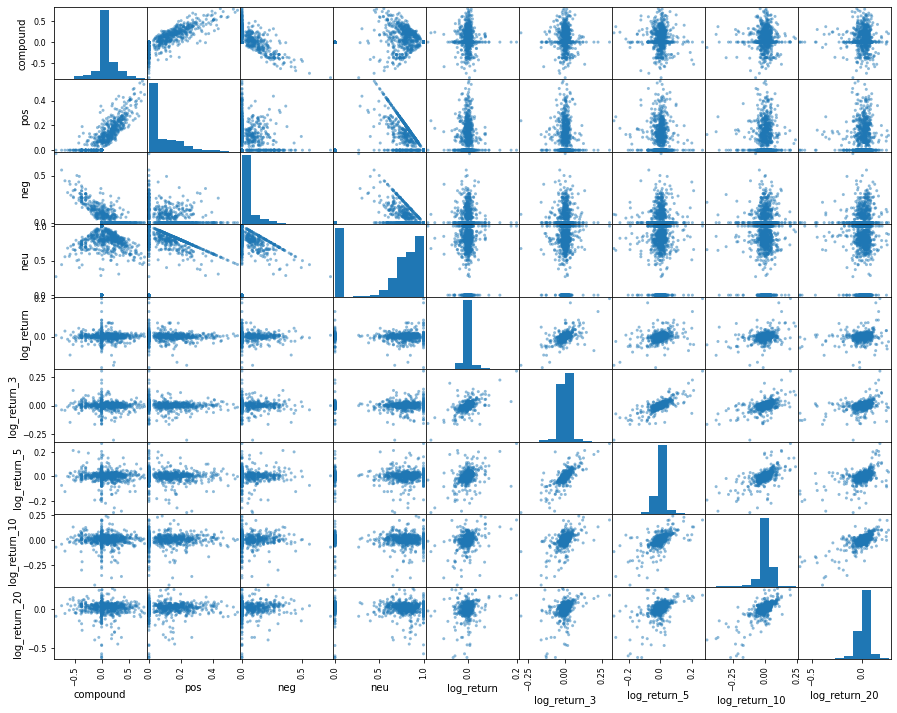

In [147]:
fig, ax = plt.subplots(1,1)
pd.plotting.scatter_matrix(result, ax=ax)
fig.set_size_inches(15, 12)


<B>Note: Neg values are absolute: so we expect negative returns to have -ve correlation with neg sentiment

In [148]:
for ret in ['log_return', 'log_return_3',
       'log_return_5', 'log_return_10', 'log_return_20']:
    # positive returns
    print('Positive Returns')
    print(result.loc[result[ret]> 0, [ret, 'compound', 'pos', 'neg']].corr()[ret])

    # negative returns
    print('Negative Returns')
    print(result.loc[result[ret]< 0, [ret, 'compound', 'pos', 'neg']].corr()[ret])
    
    print('\n\n')

Positive Returns
log_return    1.000000
compound     -0.044173
pos          -0.053036
neg           0.000048
Name: log_return, dtype: float64
Negative Returns
log_return    1.000000
compound     -0.000969
pos          -0.059716
neg          -0.062966
Name: log_return, dtype: float64



Positive Returns
log_return_3    1.000000
compound       -0.073684
pos            -0.057175
neg             0.034664
Name: log_return_3, dtype: float64
Negative Returns
log_return_3    1.000000
compound       -0.008804
pos            -0.061043
neg            -0.083069
Name: log_return_3, dtype: float64



Positive Returns
log_return_5    1.000000
compound       -0.065316
pos            -0.016161
neg             0.080596
Name: log_return_5, dtype: float64
Negative Returns
log_return_5    1.000000
compound       -0.088729
pos            -0.137141
neg            -0.033123
Name: log_return_5, dtype: float64



Positive Returns
log_return_10    1.000000
compound        -0.072095
pos             -0.021713
neg 

## SPLOM with separate positive and negative returns

### Positive return

In [149]:
pos_return = pd.concat((result[['compound', 'pos', 'neg', 'neu']],
           result.log_return[result.log_return>0],
           result.log_return_3[result.log_return_3>0],
           result.log_return_5[result.log_return_5>0],
           result.log_return_10[result.log_return_10>0],
           result.log_return_20[result.log_return_20>0]), axis=1)

<ipython-input-150-56b99997886e>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(pos_return, ax=ax)


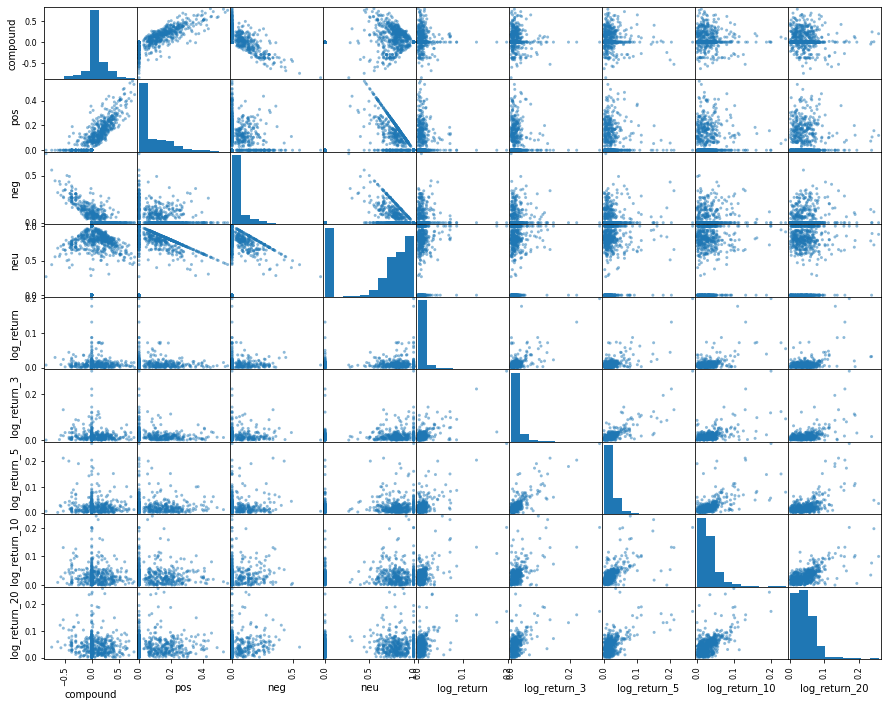

In [150]:
fig, ax = plt.subplots(1,1)
pd.plotting.scatter_matrix(pos_return, ax=ax)
fig.set_size_inches(15, 12)

In [151]:
neg_return = pd.concat((result[['compound', 'pos', 'neg', 'neu']],
           result.log_return[result.log_return<0],
           result.log_return_3[result.log_return_3<0],
           result.log_return_5[result.log_return_5<0],
           result.log_return_10[result.log_return_10<0],
           result.log_return_20[result.log_return_20<0]), axis=1)

<ipython-input-152-d4c50c116e19>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(neg_return, ax=ax)


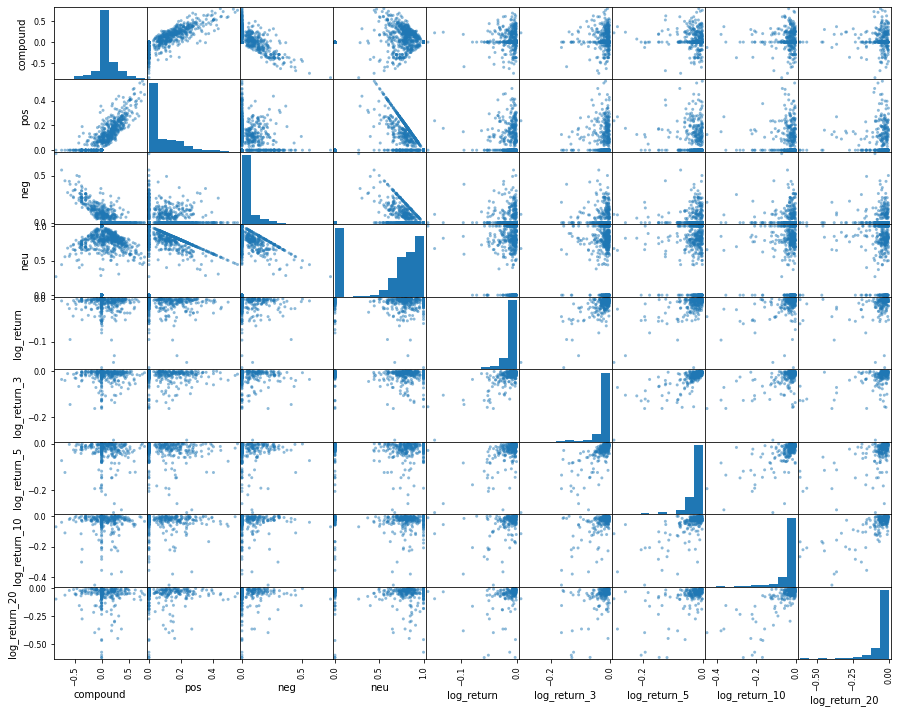

In [152]:
fig, ax = plt.subplots(1,1)
pd.plotting.scatter_matrix(neg_return, ax=ax)
fig.set_size_inches(15, 12)

In [154]:
result.corr()

compound       pos       neg       neu  log_return  \
compound       1.000000  0.772058 -0.576172  0.110206   -0.012564   
pos            0.772058  1.000000 -0.001650  0.230126   -0.045154   
neg           -0.576172 -0.001650  1.000000  0.132712   -0.026830   
neu            0.110206  0.230126  0.132712  1.000000    0.008725   
log_return    -0.012564 -0.045154 -0.026830  0.008725    1.000000   
log_return_3  -0.040084 -0.064591 -0.031143  0.016432    0.590897   
log_return_5  -0.060653 -0.062114  0.019336  0.009820    0.413115   
log_return_10 -0.007964 -0.028936 -0.025607 -0.015586    0.336044   
log_return_20 -0.016626 -0.000593  0.019579 -0.015481    0.213818   

               log_return_3  log_return_5  log_return_10  log_return_20  
compound          -0.040084     -0.060653      -0.007964      -0.016626  
pos               -0.064591     -0.062114      -0.028936      -0.000593  
neg               -0.031143      0.019336      -0.025607       0.019579  
neu                0.016432      0.009820      -0.015586      -0.015481  
log_return         0.590897      0.413115       0.336044       0.213818  
log_return_3       1.000000      0.764754       0.534317       0.386927  
log_return_5       0.764754      1.000000       0.639309       0.508144  
log_return_10      0.534317      0.639309       1.000000       0.723400  
log_return_20      0.386927      0.508144       0.723400       1.000000

In [155]:
pos_return.corr()

compound       pos       neg       neu  log_return  \
compound       1.000000  0.772058 -0.576172  0.110206   -0.044173   
pos            0.772058  1.000000 -0.001650  0.230126   -0.053036   
neg           -0.576172 -0.001650  1.000000  0.132712    0.000048   
neu            0.110206  0.230126  0.132712  1.000000    0.091134   
log_return    -0.044173 -0.053036  0.000048  0.091134    1.000000   
log_return_3  -0.073684 -0.057175  0.034664  0.090262    0.639759   
log_return_5  -0.065316 -0.016161  0.080596  0.032103    0.651904   
log_return_10 -0.072095 -0.021713  0.066926  0.036867    0.574623   
log_return_20 -0.094087 -0.015252  0.120048  0.044854    0.425855   

               log_return_3  log_return_5  log_return_10  log_return_20  
compound          -0.073684     -0.065316      -0.072095      -0.094087  
pos               -0.057175     -0.016161      -0.021713      -0.015252  
neg                0.034664      0.080596       0.066926       0.120048  
neu                0.090262      0.032103       0.036867       0.044854  
log_return         0.639759      0.651904       0.574623       0.425855  
log_return_3       1.000000      0.792119       0.582288       0.505594  
log_return_5       0.792119      1.000000       0.602469       0.568176  
log_return_10      0.582288      0.602469       1.000000       0.596524  
log_return_20      0.505594      0.568176       0.596524       1.000000

In [156]:
neg_return.corr()

compound       pos       neg       neu  log_return  \
compound       1.000000  0.772058 -0.576172  0.110206   -0.000969   
pos            0.772058  1.000000 -0.001650  0.230126   -0.059716   
neg           -0.576172 -0.001650  1.000000  0.132712   -0.062966   
neu            0.110206  0.230126  0.132712  1.000000   -0.056848   
log_return    -0.000969 -0.059716 -0.062966 -0.056848    1.000000   
log_return_3  -0.008804 -0.061043 -0.083069 -0.048295    0.712655   
log_return_5  -0.088729 -0.137141 -0.033123 -0.036824    0.582276   
log_return_10 -0.000881 -0.049430 -0.042032 -0.002553    0.369330   
log_return_20 -0.006180  0.016097  0.023602  0.048361    0.261624   

               log_return_3  log_return_5  log_return_10  log_return_20  
compound          -0.008804     -0.088729      -0.000881      -0.006180  
pos               -0.061043     -0.137141      -0.049430       0.016097  
neg               -0.083069     -0.033123      -0.042032       0.023602  
neu               -0.048295     -0.036824      -0.002553       0.048361  
log_return         0.712655      0.582276       0.369330       0.261624  
log_return_3       1.000000      0.742394       0.518107       0.427697  
log_return_5       0.742394      1.000000       0.652813       0.541512  
log_return_10      0.518107      0.652813       1.000000       0.738558  
log_return_20      0.427697      0.541512       0.738558       1.000000

In [158]:
neg_return.describe()

compound          pos          neg          neu  log_return  \
count  1037.000000  1037.000000  1037.000000  1037.000000  485.000000   
mean      0.054945     0.076658     0.044473     0.596324   -0.011520   
std       0.204535     0.108892     0.089153     0.392640    0.017317   
min      -0.848100     0.000000     0.000000     0.000000   -0.160388   
25%       0.000000     0.000000     0.000000     0.000000   -0.013093   
50%       0.000000     0.000000     0.000000     0.769667   -0.005906   
75%       0.161780     0.138857     0.059200     0.898000   -0.002362   
max       0.796400     0.556000     0.732000     1.000000   -0.000083   

       log_return_3  log_return_5  log_return_10  log_return_20  
count    452.000000    414.000000     400.000000     345.000000  
mean      -0.020338     -0.028157      -0.037401      -0.060907  
std        0.030314      0.040478       0.057339       0.094046  
min       -0.300481     -0.295477      -0.450320      -0.619987  
25%       -0.021396     -0.031780      -0.038106      -0.061233  
50%       -0.010797     -0.015029      -0.020433      -0.032050  
75%       -0.004754     -0.006889      -0.009444      -0.014280  
max       -0.000089     -0.000091      -0.000387      -0.000207

In [159]:
pos_return.describe()

compound          pos          neg          neu  log_return  \
count  1037.000000  1037.000000  1037.000000  1037.000000  551.000000   
mean      0.054945     0.076658     0.044473     0.596324    0.011153   
std       0.204535     0.108892     0.089153     0.392640    0.016931   
min      -0.848100     0.000000     0.000000     0.000000    0.000094   
25%       0.000000     0.000000     0.000000     0.000000    0.003270   
50%       0.000000     0.000000     0.000000     0.769667    0.007088   
75%       0.161780     0.138857     0.059200     0.898000    0.012747   
max       0.796400     0.556000     0.732000     1.000000    0.197885   

       log_return_3  log_return_5  log_return_10  log_return_20  
count    581.000000    622.000000     632.000000     677.000000  
mean       0.018826      0.023347       0.031951       0.044437  
std        0.025708      0.029311       0.030483       0.034532  
min        0.000107      0.000085       0.000105       0.000609  
25%        0.005879      0.007841       0.012267       0.020409  
50%        0.012335      0.015675       0.026026       0.038017  
75%        0.021909      0.026978       0.041894       0.059334  
max        0.302186      0.269279       0.240962       0.258127

In [166]:
pos_return[pos_return.compound>0].describe().loc['count']

compound         390.0
pos              390.0
neg              390.0
neu              390.0
log_return       210.0
log_return_3     215.0
log_return_5     232.0
log_return_10    236.0
log_return_20    255.0
Name: count, dtype: float64

In [167]:
pos_return[pos_return.compound<0].describe().loc['count']

compound         169.0
pos              169.0
neg              169.0
neu              169.0
log_return        90.0
log_return_3      89.0
log_return_5     107.0
log_return_10     95.0
log_return_20    103.0
Name: count, dtype: float64

In [169]:
neg_return[neg_return.compound>0].describe().loc['count']

compound         390.0
pos              390.0
neg              390.0
neu              390.0
log_return       179.0
log_return_3     173.0
log_return_5     157.0
log_return_10    153.0
log_return_20    130.0
Name: count, dtype: float64

In [171]:
neg_return[neg_return.compound<0].describe().loc['count']

compound         169.0
pos              169.0
neg              169.0
neu              169.0
log_return        78.0
log_return_3      80.0
log_return_5      62.0
log_return_10     73.0
log_return_20     63.0
Name: count, dtype: float64

# What if we do analysis with max sentiment value data points for each day?

WIP

In [134]:
px_data.loc[start_date_chart: end_date_chart, "AXP"]

Date
2016-04-20     60.067616
2016-04-21     60.612679
2016-04-22     60.908306
2016-04-25     60.695805
2016-04-26     61.157734
2016-04-27     61.185467
2016-04-28     60.825153
2016-04-29     60.446388
2016-05-02     60.677341
2016-05-03     59.910564
2016-05-04     59.365513
2016-05-05     59.051392
2016-05-06     59.596474
2016-05-09     59.106831
2016-05-10     59.901325
2016-05-11     59.670361
2016-05-12     59.439396
2016-05-13     59.236164
2016-05-16     59.189964
2016-05-17     57.979748
2016-05-18     58.681858
2016-05-19     57.961277
2016-05-20     59.051392
2016-05-23     58.746529
2016-05-24     59.929031
2016-05-25     60.335522
2016-05-26     60.261627
2016-05-27     60.529522
2016-05-31     60.751259
2016-06-01     60.889824
2016-06-02     61.351753
2016-06-03     60.501801
2016-06-06     60.917534
2016-06-07     60.871353
2016-06-08     61.213177
2016-06-09     60.705063
2016-06-10     60.021423
2016-06-13     58.820446
2016-06-14     56.418480
2016-06-15     56.74

In [136]:
px_data_log = np.log(px_data.shift(-2) / px_data)
px_data_log = px_data_log.loc[start_date_chart: end_date_chart, "AXP"]
px_data_log.sort_index()

Date
2016-04-20    0.013899
2016-04-21    0.001370
2016-04-22    0.004087
2016-04-25    0.008035
2016-04-26   -0.005453
2016-04-27   -0.012153
2016-04-28   -0.002433
2016-04-29   -0.008904
2016-05-02   -0.021857
2016-05-03   -0.014445
2016-05-04    0.003883
2016-05-05    0.000938
2016-05-06    0.005102
2016-05-09    0.009489
2016-05-10   -0.007741
2016-05-11   -0.007303
2016-05-12   -0.004205
2016-05-13   -0.021438
2016-05-16   -0.008621
2016-05-17   -0.000319
2016-05-18    0.006277
2016-05-19    0.013457
2016-05-20    0.014753
2016-05-23    0.026689
2016-05-24    0.005534
2016-05-25    0.003210
2016-05-26    0.008092
2016-05-27    0.005935
2016-05-31    0.009836
2016-06-01   -0.006393
2016-06-02   -0.007103
2016-06-03    0.006090
2016-06-06    0.004841
2016-06-07   -0.002736
2016-06-08   -0.019661
2016-06-09   -0.031538
2016-06-10   -0.061905
2016-06-13   -0.035978
2016-06-14    0.013984
2016-06-15    0.007138
2016-06-16    0.005957
2016-06-17    0.006927
2016-06-20   -0.005634
2016-0

In [65]:
#Test code interim results before agg
series_score = get_score_df(headlines,'AXP')

start_date_chart = series_score.index.min()
end_date_chart = series_score.index.max()

px_data_log = np.log(px_data / px_data.shift(1))
px_data_log = px_data_log.loc[start_date_chart: end_date_chart, "AXP"]
res = series_score.merge(px_data_log, how='right', left_index=True, right_index=True).fillna(0)
res

compound    pos    neg    neu       AXP
2016-04-20   -0.3719  0.000  0.267  0.733  0.022553
2016-04-20    0.0000  0.000  0.000  1.000  0.022553
2016-04-20    0.0000  0.000  0.000  1.000  0.022553
2016-04-20   -0.1531  0.000  0.167  0.833  0.022553
2016-04-20    0.0000  0.000  0.000  1.000  0.022553
2016-04-20    0.0000  0.000  0.000  1.000  0.022553
2016-04-20   -0.0391  0.219  0.233  0.548  0.022553
2016-04-21   -0.4019  0.000  0.474  0.526  0.009033
2016-04-21   -0.4019  0.000  0.252  0.748  0.009033
2016-04-21    0.0000  0.000  0.000  1.000  0.009033
2016-04-21    0.0000  0.000  0.000  1.000  0.009033
2016-04-22    0.0000  0.000  0.000  1.000  0.004865
2016-04-22    0.0000  0.000  0.000  1.000  0.004865
2016-04-22    0.4019  0.351  0.000  0.649  0.004865
2016-04-25    0.0000  0.000  0.000  0.000 -0.003495
2016-04-26    0.0000  0.000  0.000  0.000  0.007582
2016-04-27    0.0000  0.000  0.000  0.000  0.000453
2016-04-28    0.0000  0.000  0.000  0.000 -0.005906
2016-04-29    0.0000  0.000  0.000  0.000 -0.006247
2016-05-02    0.0000  0.000  0.000  1.000  0.003814
2016-05-02    0.4019  0.310  0.000  0.690  0.003814
2016-05-02    0.0000  0.000  0.000  1.000  0.003814
2016-05-02    0.0000  0.000  0.000  1.000  0.003814
2016-05-02    0.0000  0.000  0.000  1.000  0.003814
2016-05-03    0.0000  0.000  0.000  1.000 -0.012717
2016-05-03    0.0000  0.000  0.000  1.000 -0.012717
2016-05-04    0.0000  0.000  0.000  1.000 -0.009139
2016-05-04    0.0000  0.000  0.000  1.000 -0.009139
2016-05-05    0.0000  0.000  0.000  0.000 -0.005305
2016-05-06    0.3400  0.255  0.000  0.745  0.009188
2016-05-06    0.3182  0.247  0.000  0.753  0.009188
2016-05-09    0.0000  0.000  0.000  1.000 -0.008250
2016-05-09    0.0000  0.000  0.000  1.000 -0.008250
2016-05-09    0.0000  0.000  0.000  1.000 -0.008250
2016-05-09    0.0258  0.243  0.237  0.520 -0.008250
2016-05-10   -0.3719  0.000  0.203  0.797  0.013352
2016-05-10   -0.1280  0.000  0.200  0.800  0.013352
2016-05-11    0.0000  0.000  0.000  0.000 -0.003863
2016-05-12    0.0000  0.000  0.000  0.000 -0.003878
2016-05-13    0.0000  0.000  0.000  1.000 -0.003425
2016-05-16    0.0000  0.000  0.000  0.000 -0.000780
2016-05-17    0.0000  0.000  0.000  1.000 -0.020658
2016-05-17    0.2500  0.313  0.239  0.448 -0.020658
2016-05-17    0.1027  0.113  0.000  0.887 -0.020658
2016-05-18   -0.3400  0.000  0.194  0.806  0.012037
2016-05-19    0.0000  0.000  0.000  0.000 -0.012355
2016-05-20    0.0000  0.000  0.000  1.000  0.018633
2016-05-20    0.5574  0.340  0.000  0.660  0.018633
2016-05-20    0.0000  0.000  0.000  1.000  0.018633
2016-05-20    0.3818  0.342  0.000  0.658  0.018633
2016-05-23    0.0000  0.000  0.000  1.000 -0.005176
2016-05-23   -0.4939  0.000  0.286  0.714 -0.005176
2016-05-24   -0.3719  0.000  0.267  0.733  0.019929
2016-05-24    0.0000  0.000  0.000  1.000  0.019929
2016-05-24    0.3677  0.388  0.000  0.612  0.019929
2016-05-25    0.3677  0.220  0.000  0.780  0.006760
2016-05-25   -0.2732  0.000  0.189  0.811  0.006760
2016-05-26    0.0000  0.000  0.000  0.000 -0.001225
2016-05-27    0.0000  0.000  0.000  1.000  0.004436
2016-05-31   -0.8481  0.000  0.732  0.268  0.003657
2016-06-01    0.0000  0.000  0.000  1.000  0.002278
2016-06-02    0.0000  0.000  0.000  0.000  0.007558
2016-06-03    0.0000  0.000  0.000  1.000 -0.013951
2016-06-06    0.0000  0.000  0.000  1.000  0.006848
2016-06-07    0.6035  0.497  0.000  0.503 -0.000758
2016-06-08    0.0000  0.000  0.000  1.000  0.005600
2016-06-09    0.0000  0.000  0.000  1.000 -0.008335
2016-06-10    0.0000  0.000  0.000  1.000 -0.011326
2016-06-10    0.1027  0.220  0.186  0.593 -0.011326
2016-06-13    0.5859  0.490  0.000  0.510 -0.020212
2016-06-14   -0.2960  0.000  0.216  0.784 -0.041693
2016-06-14   -0.3400  0.000  0.255  0.745 -0.041693
2016-06-14   -0.4019  0.000  0.213  0.787 -0.041693
2016-06-14   -0.5423  0.000  0.391  0.609 -0.041693
2016-06-14   -0.3295  0.246  0.469  0.284 -0.041693
2016-06-14    0.0516  0.289  0.267  0.444 -0.041693
2016-06-

In [66]:
res_agg = res.groupby(res.index).agg({'compound': [min, max],
                                        'pos': max,
                                        'neg': max})

In [67]:
### WIP WIP WIP

In [68]:
# res_agg['compound_min_abs'] = res_agg[('compound', 'min')].abs()
# res_agg['compound_max_abs'] = res_agg[('compound', 'max')].abs()
res_agg['compound_maxabs'] = None

for row in res_agg.iterrows():
    print(row[('compound','min')])
    if row[('compound', 'min')].abs() > row[('compound', 'max')].abs():
        row['compound_maxabs'] = row[('compound', 'min')]
    else:
        row['compound_maxabs'] = row[('compound', 'max')]
        
res_agg

TypeError: tuple indices must be integers or slices, not tuple

In [ ]:
def get_analysis_maxabs(df, stock):
    """
    df: headline or ratings df containing scores
    stock: stock name to get scores and prices from px_data
    score: ("compound", "pos", "neg", "neu")
    """
    series_score = get_score_df(df, stock)
    
    # 1d return
    px_data_log = np.log(px_data / px_data.shift(1))
    
    # trim dates
    start_date_chart = series_score.index.min()
    end_date_chart = series_score.index.max()
    px_data_log = px_data_log.loc[start_date_chart: end_date_chart, stock]
    px_data_log.rename('log_return', inplace=True)
    
    # merge filter date range and stock
    res = series_score.merge(px_data_log, how='right', left_index=True, right_index=True).fillna(0)
    res = res.groupby(res.index).agg(np.mean)
    
    # from documentation of headlines data source, we should shift 1 day for publication of the news
    res.loc[:,['compound', 'pos', 'neg', 'neu']] = res.loc[:,['compound', 'pos', 'neg', 'neu']].shift(1)
    
    # add other period returns
    for shift in [3,5,10,20]:
        px_return_shift = np.log(px_data / px_data.shift(shift))
        res.loc[:, 'log_return_' + str(shift)] = px_return_shift.loc[res.index, stock]
    
    return res

# Yahoo Finance API - We are not using this for this project anymore

In [ ]:
import requests
def sendRequest(stock):
    url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-chart"

    querystring = {"interval":"1d","symbol":stock,"range":"10y","region":"US"}

    headers = {
        'x-rapidapi-key': "bcfa998f82msh8147536c9705b6cp1082b2jsn8a170fe34c8a",
        'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    if response.status_code==200:
        return response.text
    else:
        return None

In [ ]:
sendRequest('TSLA')

In [ ]:
import json
def getHistData(stock):
    response = sendRequest(stock)
    histdata = pd.DataFrame()
    if response == None:
        return histdata
    else:
        try:
            jsondata = json.loads(response)

            #print(data2['chart']["result"][0]["indicators"]["quote"][0])
            timestamps = pd.Series(jsondata['chart']["result"][0]["timestamp"])
            high = pd.Series(jsondata['chart']["result"][0]["indicators"]["quote"][0]["high"])
            low = pd.Series(jsondata['chart']["result"][0]["indicators"]["quote"][0]["low"])
            close = pd.Series(jsondata['chart']["result"][0]["indicators"]["adjclose"][0]["adjclose"])
            columns = {"timestamps":timestamps,"high":high,"low":low,"close":close,"stock":stock}
            histdata = pd.DataFrame(columns)
            return histdata
        except:
            print(stock)
            print(response)
            return pd.DataFrame()
            


In [ ]:
getHistData('TSLA')

# yfinance package